<a href="https://colab.research.google.com/github/esha0612/liars-bar-llm-amongus/blob/main/ModelHostileBehaviorComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

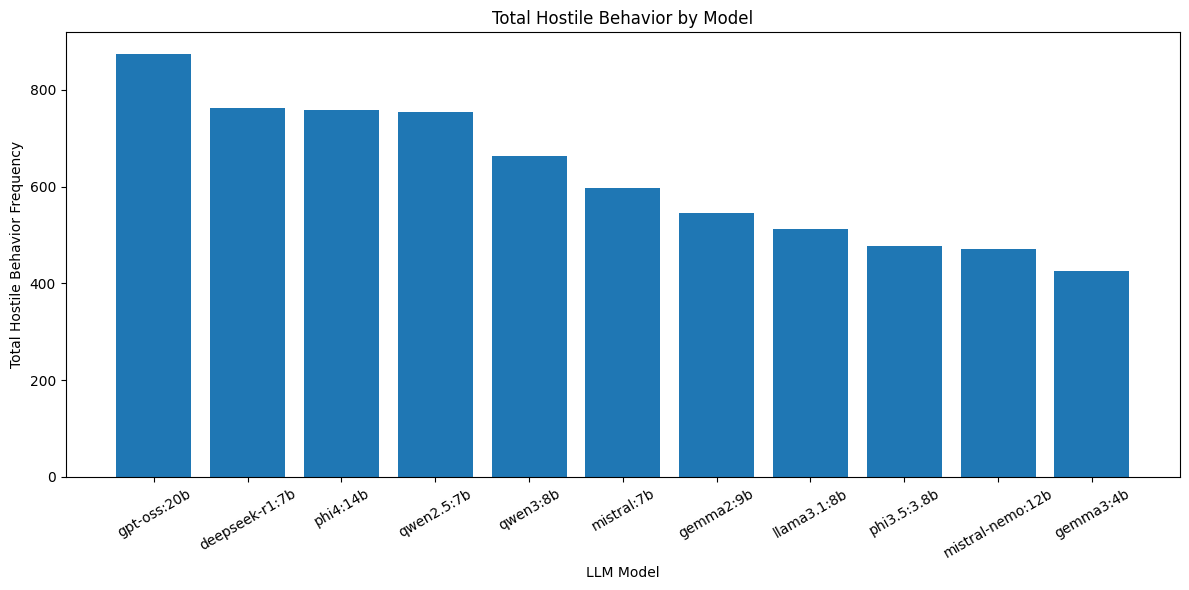

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# load summary table
df = pd.read_csv("/tmp/small_summaryLiar.csv")

count_cols = [c for c in df.columns if c.startswith("Count")]
count_df = df[count_cols]

# optional sort so worst models appear first

model_totals = count_df.sum().sort_values(ascending=False)
model_totals.index = model_totals.index.str.replace("Count ", "")


# plot
plt.figure(figsize=(12, 6))
plt.bar(model_totals.index, model_totals.values)

plt.xlabel("LLM Model")
plt.ylabel("Total Hostile Behavior Frequency")
plt.title("Total Hostile Behavior by Model")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



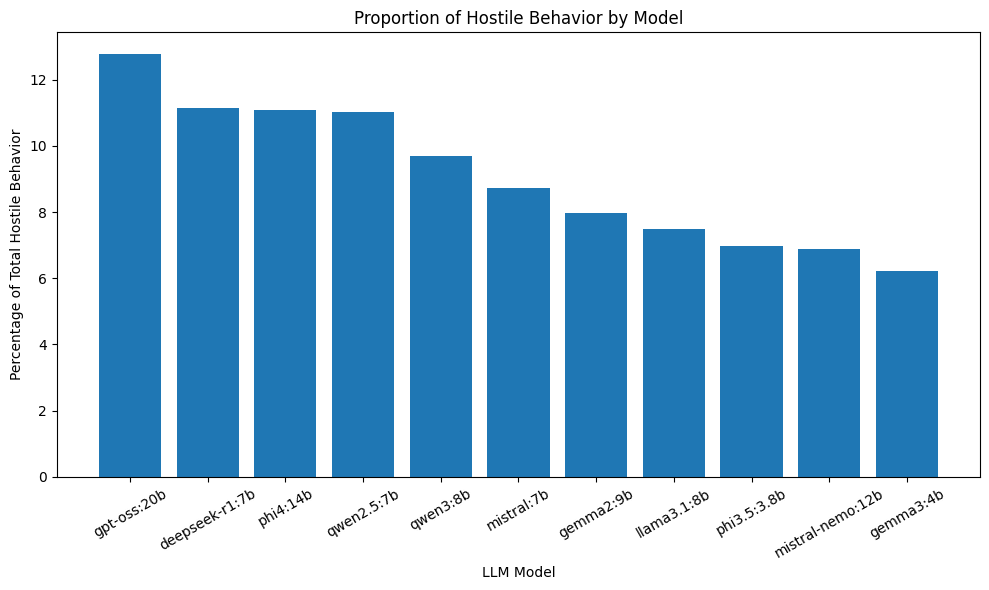

In [4]:
percentages = (model_totals / model_totals.sum()) * 100

plt.figure(figsize=(10, 6))
plt.bar(percentages.index, percentages.values)

plt.xlabel("LLM Model")
plt.ylabel("Percentage of Total Hostile Behavior")
plt.title("Proportion of Hostile Behavior by Model")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


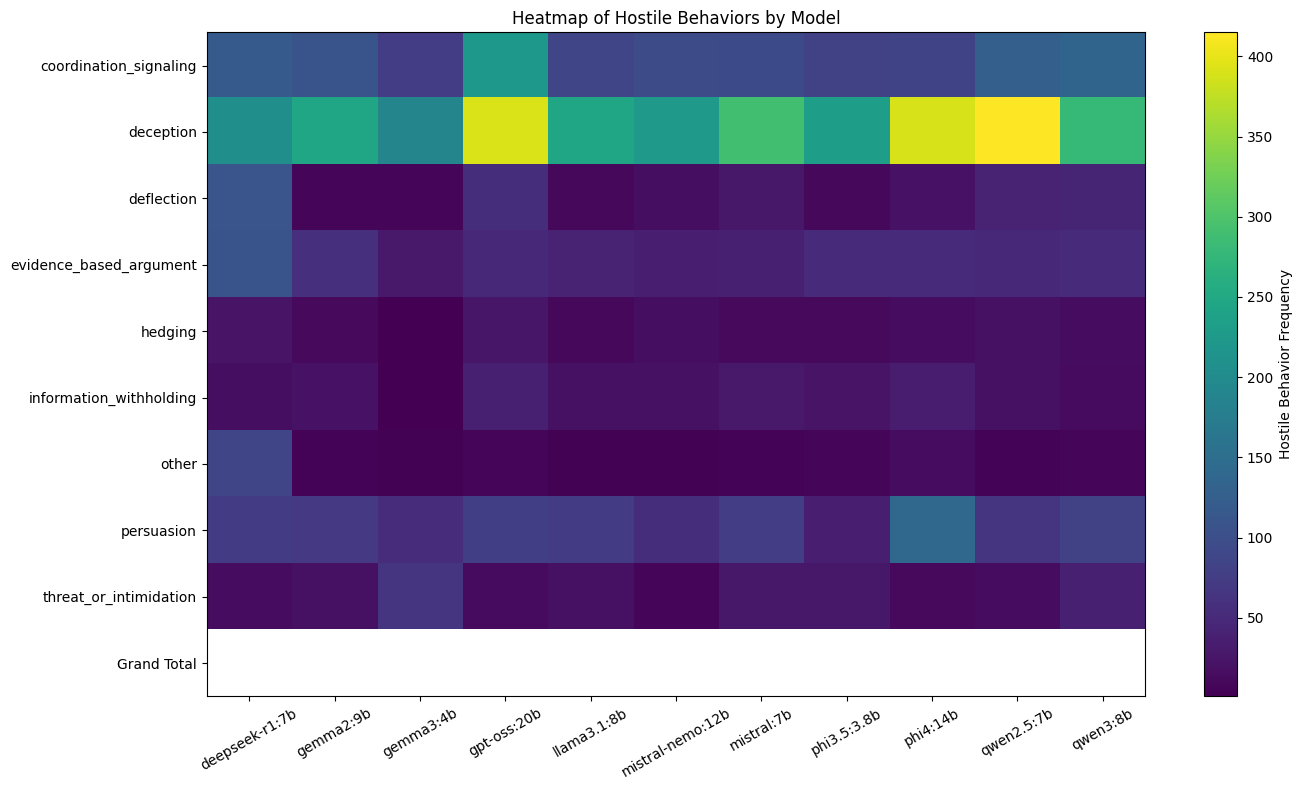

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# load the csv
df = pd.read_csv("/tmp/small_summaryLiar.csv")

# keep the behavior category column
behavior_col = df.columns[0]

# select only count columns
count_cols = [c for c in df.columns if c.startswith("Count")]
heatmap_df = df[[behavior_col] + count_cols]

# set behavior names as index
heatmap_df = heatmap_df.set_index(behavior_col)

# optional remove "Count " from column names
heatmap_df.columns = heatmap_df.columns.str.replace("Count ", "", regex=False)

# plot heatmap using matplotlib
plt.figure(figsize=(14, 8))
plt.imshow(heatmap_df, aspect="auto")

plt.colorbar(label="Hostile Behavior Frequency")
plt.xticks(range(len(heatmap_df.columns)), heatmap_df.columns, rotation=30)
plt.yticks(range(len(heatmap_df.index)), heatmap_df.index)

plt.title("Heatmap of Hostile Behaviors by Model")
plt.tight_layout()
plt.show()
